In [99]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
words = open("names.txt").read().splitlines()

In [101]:
len(words)

32033

In [102]:
chars = sorted(list(set(''.join(words))))
vocab_size = len(chars) + 1
# encoding and decoding chars
stoi = {ch: i + 1 for i, ch in enumerate(chars)}
stoi['.'] = 0
itos = {i: ch for ch, i in stoi.items()}

In [110]:
# build dataset
X, Y = [], []
block_size = 3 # size of context for predictions

for word in words:
    context = [0] * block_size
    for ch in word + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [104]:
X[0], Y[0]

(tensor([0, 0, 0]), tensor(5))

In [131]:
# hyperparameters
learning_rate = 0.001
max_epochs = 1000
batch_size = 32

In [146]:
# first layer
g = torch.Generator().manual_seed(42)
C = torch.randn(vocab_size, 2, generator=g)
W1 = torch.randn(6, 100, generator=g)
b1 = torch.randn(100, generator=g)

# output layer
W2 = torch.randn(100, vocab_size, generator=g)
b2 = torch.randn(vocab_size, generator=g)
parameters = [C, W1, b1, W2, b2]

In [147]:
for param in parameters:
    param.requires_grad_()

In [148]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10 ** lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [149]:
lri =[]
lossi = []
for i in range(max_epochs):
    # construct minibatch
    ix = torch.randint(0, X.shape[0], (batch_size,))
    # forward pass
    tok_emb = C[X[ix]] # T x block_size x C
    h = torch.tanh(tok_emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix]) 
    
    if i % 10 == 0:
        print(f'Loss: {loss:.4f}')

    # backward pass
    for p in parameters: # zero out the gradients
        p.grad = None
    loss.backward()

    # update parameters
    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad

    lri.append(lre[i])
    lossi.append(loss.item())


Loss: 16.2255
Loss: 14.8220
Loss: 15.8333
Loss: 16.1508
Loss: 16.3536
Loss: 15.1103
Loss: 15.4700
Loss: 15.6798
Loss: 14.8028
Loss: 13.1779
Loss: 14.7821
Loss: 14.8262
Loss: 12.6454
Loss: 15.5774
Loss: 12.1913
Loss: 16.2069
Loss: 13.7889
Loss: 11.7490
Loss: 10.1712
Loss: 11.7680
Loss: 13.1454
Loss: 12.2169
Loss: 11.5735
Loss: 10.1182
Loss: 14.4185
Loss: 11.4756
Loss: 11.1435
Loss: 10.4169
Loss: 10.5142
Loss: 12.4964
Loss: 8.4739
Loss: 10.0587
Loss: 10.4276
Loss: 8.8427
Loss: 9.9574
Loss: 8.6363
Loss: 7.0929
Loss: 6.9721
Loss: 7.5583
Loss: 7.9945
Loss: 7.4786
Loss: 6.6951
Loss: 8.4726
Loss: 5.1630
Loss: 7.4790
Loss: 6.6783
Loss: 6.4037
Loss: 5.8029
Loss: 6.7092
Loss: 5.9894
Loss: 5.4219
Loss: 4.9733
Loss: 6.1846
Loss: 5.1471
Loss: 4.2749
Loss: 4.3659
Loss: 4.1380
Loss: 4.2108
Loss: 3.8396
Loss: 4.5311
Loss: 3.3320
Loss: 4.6892
Loss: 3.1452
Loss: 3.6325
Loss: 3.4972
Loss: 2.9157
Loss: 2.5693
Loss: 3.1574
Loss: 4.1938
Loss: 3.5085
Loss: 3.0490
Loss: 2.8200
Loss: 2.8484
Loss: 2.9173
Loss: 

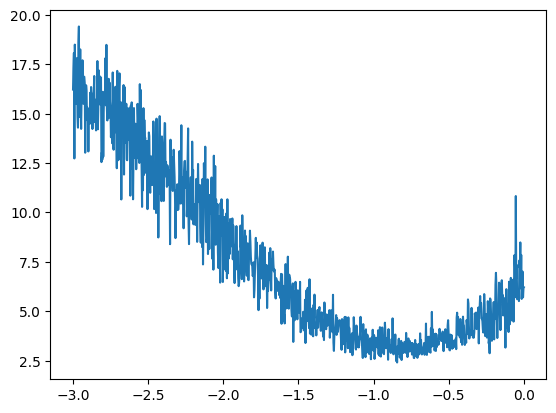

In [151]:
# determining a good learning rate
plt.plot(lri, lossi)

In [125]:
tok_emb = C[X] # T x block_size x C
h = torch.tanh(tok_emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y) 
loss.item()

2.70049786567688